1. 데이터는 일자별 각 나라의 일일 확진자수를 나타낸다. 각 나라의 일자별 누적확진자 수를 나타내는 데이터 프레임을 생성하라.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("problem3_covid2.csv")
df.head()

,location,date,new_cases
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,1391.0
2,Austria,2021-01-03,1466.0
3,Austria,2021-01-04,1642.0
4,Austria,2021-01-05,2311.0


In [4]:
target = df.groupby(['location','date']).sum().groupby(level=0).cumsum()
target.columns = ['cumulative sum']
target = target.reset_index()
target

,location,date,cumulative sum
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,3487.0
2,Austria,2021-01-03,4953.0
3,Austria,2021-01-04,6595.0
4,Austria,2021-01-05,8906.0
...,...,...,...
11890,Vanuatu,2021-10-28,5.0
11891,Vanuatu,2021-10-29,5.0
11892,Vanuatu,2021-10-30,5.0
11893,Vanuatu,2021-10-31,5.0


2. 1에서 구한 데이터를 각 나라별로 acf 값을 구하고 lag는 50개까지 구하고, 첫번째 값을 제외하라. 국가를 기준으로 유클라디안 거리를 기준으로 클러스터링을 진행 후 계층적 군집 분석을 위해 덴드로그램을 작성하시오.

In [5]:
from scipy.spatial import distance
import statsmodels.api as sm

name = []
for lo in target.location.unique():
    v = sm.tsa.stattools.acf(target[target.location==lo]['cumulative sum'],
                            nlags=50, fft = False)
    name.append([lo]+list(v[1:]))

v = pd.DataFrame(name)

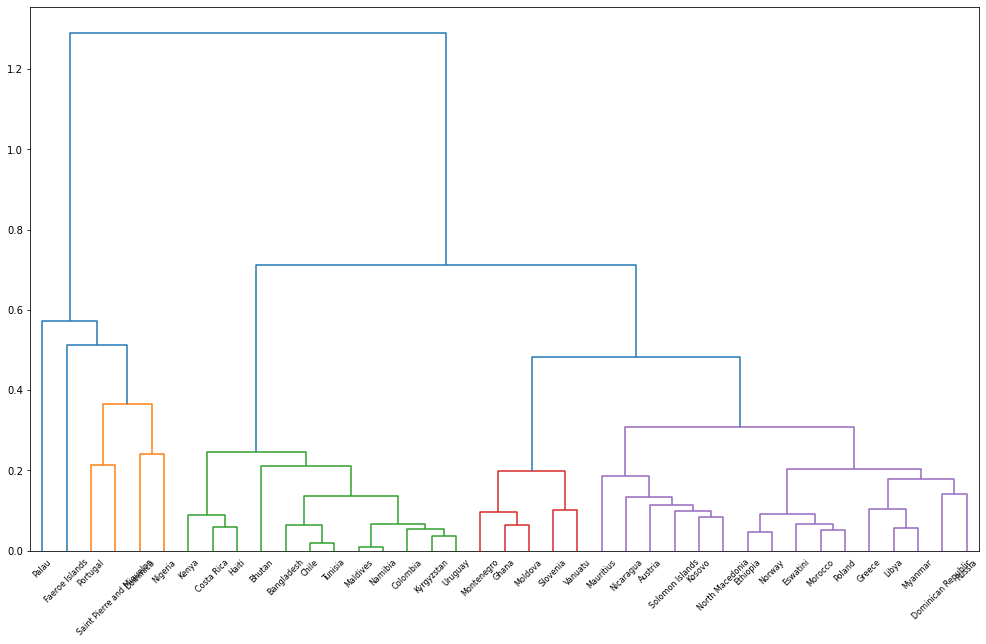

In [10]:
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

data = v.set_index(0)
label = np.array(data.index)

data_value = data.values
fig = plt.figure(figsize = (17,10))

ax3 = fig.add_subplot(1,1,1)
dend3 = sch.linkage(data_value,method = 'average',metric = 'euclidean')

cutoff = 0.3*max(dend3[:,2])
dend_res3 = sch.dendrogram(dend3,color_threshold = cutoff)
ax3.set_xticklabels(label[dend_res3['leaves']],minor=False)

plt.show()